In [1]:
%matplotlib inline
import requests
import json
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps

# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [2]:
# Import and prepare data

df = pd.read_csv('../data/allsvenskan.csv')
df['ppg_3pwin'] = (df.wins*3 + df.draws)/df.games
venues = pd.read_csv('../data/venues.csv')
final_rounds = df.query('final == 1')
since_2008 = df.loc[2008:]
final_rounds_since_2008 = final_rounds.loc[2008:]

### Maratontabellen



In [32]:
team = 'Malmö FF'

def team_not_in_season(year):
    print(year.values)

final_rounds.groupby('team_name')['year'].value_counts()

team_name       year
AFC Eskilstuna  2017    1
                2019    1
AIK             1925    1
                1926    1
                1927    1
                       ..
Östersunds FK   2017    1
                2018    1
                2019    1
                2020    1
                2021    1
Name: year, Length: 1295, dtype: int64

In [16]:
# Point progression per season for every team

points_progression = final_rounds.pivot_table(values='points', index='year', columns='team_name').cumsum()
points_progression.loc[1925].fillna(0, inplace=True)
points_progression.ffill(inplace=True)
# points_progression

team_name,AFC Eskilstuna,AIK,Assyriska FF,BK Derby,BK Häcken,Billingsfors IK,Brynäs IF FK,Dalkurd FF,Degerfors IF,Djurgårdens IF,...,Varbergs BoIS,Västerås IK,Västerås SK FK,Västra Frölunda IF,Westermalms IF FK,Åtvidabergs FF,Örebro SK,Örgryte IS,Östers IF,Östersunds FK
year,,,,,,,,,,,,,,,,,,,,,
1925,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0
1926,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0
1927,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,14.0,0.0,0.0,99.0,0.0,0.0
1928,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,9.0,0.0,0.0,14.0,0.0,0.0,132.0,0.0,0.0
1929,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,9.0,0.0,0.0,27.0,0.0,0.0,165.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,40.0,2841.0,14.0,12.0,713.0,3.0,12.0,24.0,657.0,1985.0,...,0.0,9.0,69.0,242.0,27.0,513.0,1506.0,1425.0,902.0,166.0
2020,40.0,2880.0,14.0,12.0,762.0,3.0,12.0,24.0,657.0,2033.0,...,37.0,9.0,69.0,242.0,27.0,513.0,1548.0,1425.0,902.0,199.0
2021,40.0,2939.0,14.0,12.0,798.0,3.0,12.0,24.0,691.0,2090.0,...,74.0,9.0,69.0,242.0,27.0,513.0,1566.0,1425.0,902.0,213.0


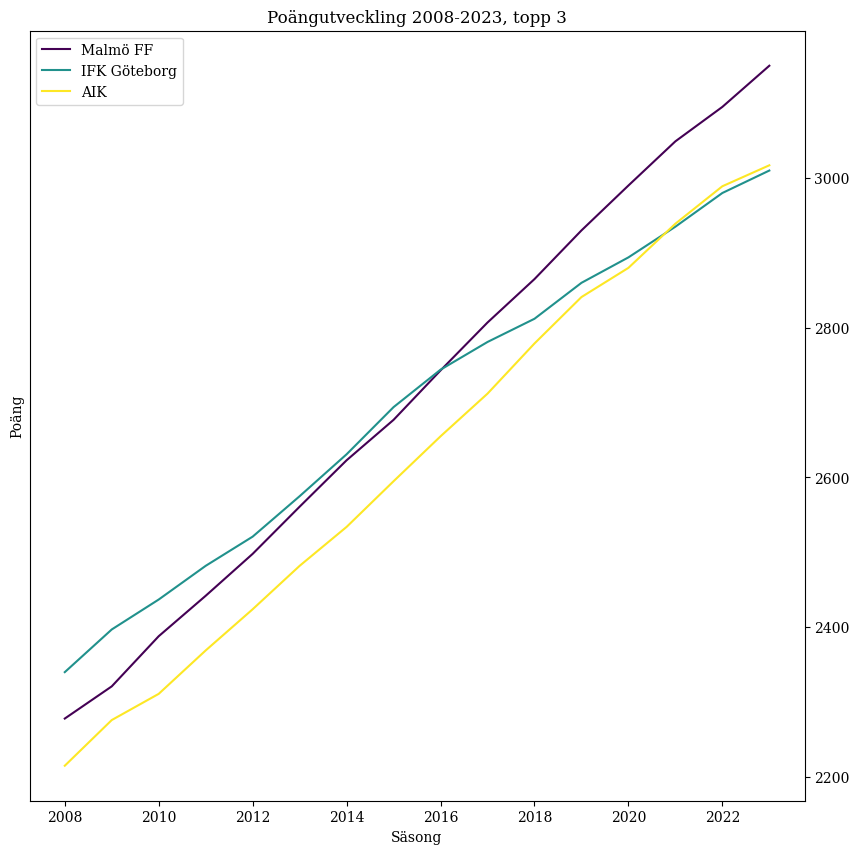

In [18]:
# Plot it

fig, ax = plt.subplots(figsize=(10, 10))

points_progression.loc[2008:2023, ['Malmö FF', 'IFK Göteborg', 'AIK']].plot(legend=True, colormap='viridis', ax=ax)
ax.set(title='Poängutveckling 2008-2023, topp 3', xlabel='Säsong', ylabel='Poäng')
ax.legend(title='')
ax.yaxis.tick_right()

<Axes: xlabel='no_of_seasons', ylabel='points_per_season'>

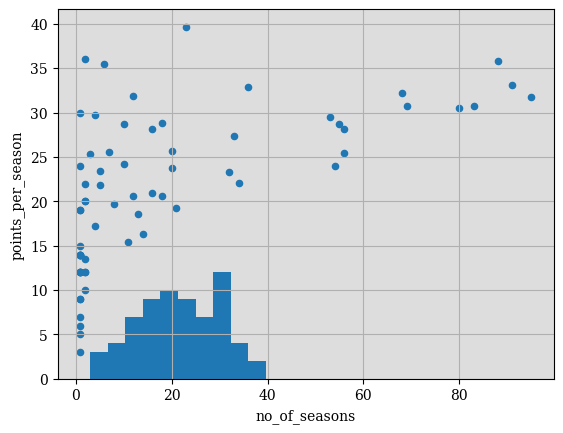

In [860]:
no_of_seasons = final_rounds.reset_index()['team_name'].value_counts().to_frame(name='no_of_seasons').reset_index(names='team_name')
total_points = final_rounds.reset_index().groupby('team_name')['points'].sum().sort_index().to_frame().reset_index()
nos_tp = no_of_seasons.merge(total_points, on='team_name')
nos_tp['points_per_season'] = nos_tp.points/nos_tp.no_of_seasons
nos_tp = nos_tp.sort_values('points_per_season', ascending=False)
# nos_tp.hist(bins=25, figsize=(10, 10))
nos_tp.plot(kind='scatter', x='no_of_seasons', y='points_per_season')

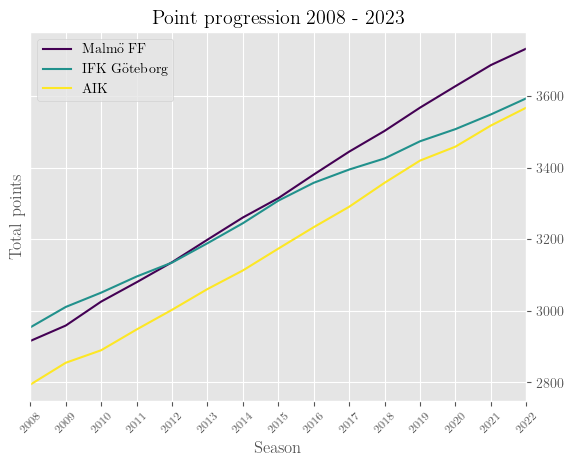

In [33]:

df = pd.read_json('data/progressions.json')
df.sort_values(axis=1, by=2023, inplace=True, ascending=False)

# Teams between 0 (first) and 67 (last)
selected_teams = slice(0, 3)
# Seasons between 1924 and 2023
seasons = (2008, 2023)

selected_seasons = slice(*df.index.get_indexer(seasons))

df = df.iloc[selected_seasons, selected_teams]

cmap = cmaps.get_cmap('viridis')

# Plot
plt.style.use('ggplot')
ax = df.plot(xticks=df.index, xlim=(df.index[0], df.index[-1]), colormap=cmap)
ax.yaxis.tick_right()
plt.title(f'Point progression {seasons[0]} - {seasons[1]}')
plt.xticks(rotation=45, fontsize='small')
plt.xlabel('Season')
plt.ylabel('Total points')
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend()

In [3]:
# Maratontabellen animated

# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps

df = pd.read_json('data/progressions.json')
df.sort_values(axis=1, by=2023, inplace=True, ascending=False)

# plt.legend('')
# plt.ioff()
# plt.style.use('default')
selected_teams = slice(0, 2)

i = 0

def plot(df, start, i):
    plt.cla()
    plt.axes().set_facecolor('gray')
    seasons = (start-5, start+1)
    selected_seasons = slice(*df.index.get_indexer(seasons))
    # df = df.iloc[selected_seasons, selected_teams]
    df.plot(xticks=[], xlim=(start-5, start+5), ylim=(df.loc[start].max()-500, df.loc[start].max()+500), legend='', alpha=0)
    # df.plot(xticks=[], xlim=(start-5, start+5), ylim=(df.loc[start].max()-500, df.loc[start].max()+500), legend='', color=['#a7d7ff', 'darkblue', 'yellow', 'cornflowerblue', 'gold'])
    for r in df:
        team = r
        x = start
        y = df[r][start]
        plt.annotate(team, [x, y], [x, y], alpha=.6)
    plt.annotate(f'{start}', xy=[start+4, df.loc[start].max()+400])
    plt.savefig(f'plots/anim/all_teams/p{i:0>2}.png')
    plt.close()
    i += 1

# for s in range(1930, 2023):
#     plot(df, s, i)
#     i += 1

df

,Malmö FF,IFK Göteborg,AIK,IFK Norrköping,IF Elfsborg,Helsingborgs IF,Djurgårdens IF,Halmstads BK,Hammarby IF,Örgryte IS,...,Norrby IF,Brynäs IF FK,Enköpings SK FK,Assyriska FF,Högadals IS,Västerås IK,IFK Holmsund,Sandvikens AIK FK,IK City,Billingsfors IK
1925,0,52,36,25,0,40,0,0,10,50,...,0,0,0,0,0,11,0,0,0,0
1926,0,98,64,54,0,87,0,0,10,100,...,0,0,0,0,0,11,0,0,7,0
1927,0,147,97,78,22,135,0,0,10,142,...,0,0,0,0,0,11,0,0,7,0
1928,0,183,125,103,55,182,18,0,10,189,...,0,0,0,0,0,11,0,0,7,0
1929,0,229,149,123,82,233,18,0,10,237,...,0,0,0,0,0,11,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3568,3474,3420,2961,2703,2490,2351,1744,1630,1782,...,15,14,14,14,12,11,10,7,7,3
2020,3628,3508,3459,3007,2754,2516,2399,1744,1671,1782,...,15,14,14,14,12,11,10,7,7,3
2021,3687,3549,3518,3051,2809,2516,2456,1776,1724,1782,...,15,14,14,14,12,11,10,7,7,3
2022,3733,3594,3568,3085,2858,2533,2513,1776,1780,1782,...,15,14,14,14,12,11,10,7,7,3


[Text(0.5, 0, 'Antal säsonger'), Text(0, 0.5, 'Totalt antal poäng')]

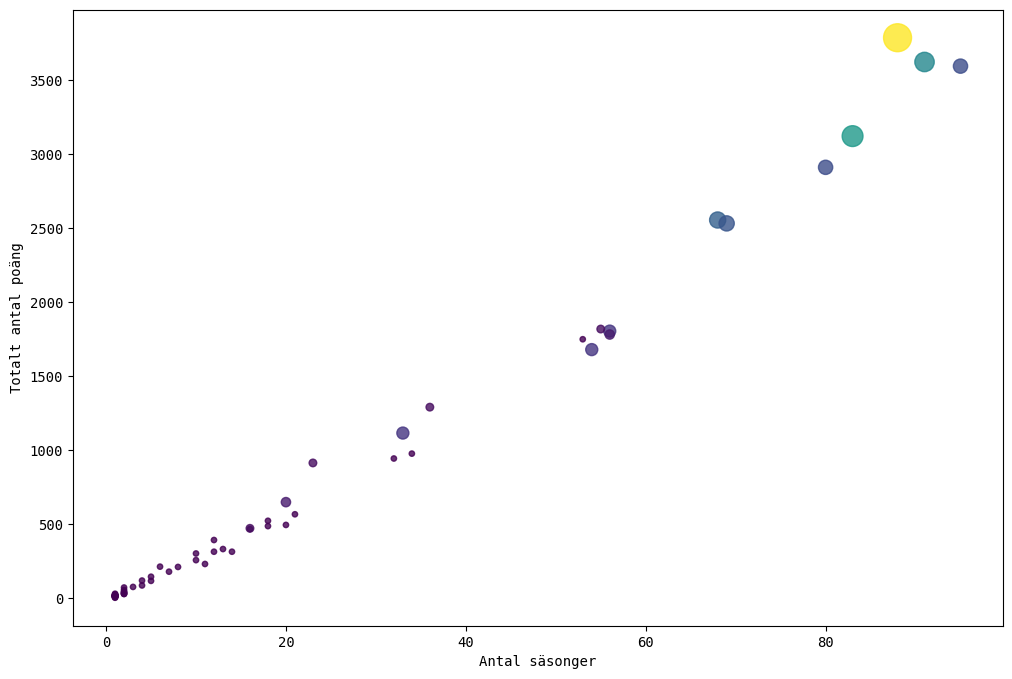

In [45]:
# data = requests.get('http://localhost:5000/team_stats/')
# json.dump(data.json(), open('data/team_stats.json', 'w'))

df = pd.read_json('data/team_stats.json')
df.iloc[2] = (df.iloc[2]+1) * 15

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.iloc[0], df.iloc[1], c=df.iloc[2], s=df.iloc[2], alpha=.8)
ax.set(xlabel='Antal säsonger', ylabel='Totalt antal poäng')

## Index of teams
<table style="font-size: 10pt;"><thead><td>Index</td><td>Team</td><td>Index</td><td>Team</td><td>Index</td><td>Team</td><td>Index</td><td>Team</td></thead><tbody><tr><td style="text-align: right; margin-right: 2px;">0</td><td>Malmö FF</td><td style="text-align: right; margin-right: 2px;">11</td><td>GAIS</td><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right;">33</td><td>IF Brommapojkarna</td><tr><tr><td style="text-align: right; margin-right: 2px;">1</td><td>IFK Göteborg</td><td style="text-align: right; margin-right: 2px;">12</td><td>Kalmar FF</td><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right;">34</td><td>IFK Sundsvall</td><tr><tr><td style="text-align: right; margin-right: 2px;">2</td><td>AIK</td><td style="text-align: right; margin-right: 2px;">13</td><td>Östers IF</td><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right;">35</td><td>Falkenbergs FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">3</td><td>IFK Norrköping</td><td style="text-align: right; margin-right: 2px;">14</td><td>Landskrona BoIS</td><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right;">36</td><td>Varbergs BoIS</td><tr><tr><td style="text-align: right; margin-right: 2px;">4</td><td>IF Elfsborg</td><td style="text-align: right; margin-right: 2px;">15</td><td>Degerfors IF</td><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right;">37</td><td>Västerås SK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">5</td><td>Helsingborgs IF</td><td style="text-align: right; margin-right: 2px;">16</td><td>BK Häcken</td><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right;">38</td><td>Syrianska FC</td><tr><tr><td style="text-align: right; margin-right: 2px;">6</td><td>Djurgårdens IF</td><td style="text-align: right; margin-right: 2px;">17</td><td>Åtvidabergs FF</td><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right;">39</td><td>Råå IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">7</td><td>Halmstads BK</td><td style="text-align: right; margin-right: 2px;">18</td><td>Sandvikens IF</td><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right;">40</td><td>IFK Värnamo</td><tr><tr><td style="text-align: right; margin-right: 2px;">8</td><td>Hammarby IF</td><td style="text-align: right; margin-right: 2px;">19</td><td>Trelleborgs FF</td><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right;">41</td><td>Ljungskile SK</td><tr><tr><td style="text-align: right; margin-right: 2px;">9</td><td>Örgryte IS</td><td style="text-align: right; margin-right: 2px;">20</td><td>GIF Sundsvall</td><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right;">42</td><td>AFC Eskilstuna</td><tr><tr><td style="text-align: right; margin-right: 2px;">10</td><td>Örebro SK</td><td style="text-align: right; margin-right: 2px;">21</td><td>IK Brage</td><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right;">43</td><td>Westermalms IF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">11</td><td>GAIS</td><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right;">44</td><td>IFK Uddevalla</td><tr><tr><td style="text-align: right; margin-right: 2px;">12</td><td>Kalmar FF</td><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right; margin-right: 2px;">34</td><td>IFK Sundsvall</td><td style="text-align: right;">45</td><td>Umeå FC</td><tr><tr><td style="text-align: right; margin-right: 2px;">13</td><td>Östers IF</td><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right; margin-right: 2px;">35</td><td>Falkenbergs FF</td><td style="text-align: right;">46</td><td>Hallstahammar SK</td><tr><tr><td style="text-align: right; margin-right: 2px;">14</td><td>Landskrona BoIS</td><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right; margin-right: 2px;">36</td><td>Varbergs BoIS</td><td style="text-align: right;">47</td><td>Stattena IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">15</td><td>Degerfors IF</td><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right; margin-right: 2px;">37</td><td>Västerås SK FK</td><td style="text-align: right;">48</td><td>Motala AIF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">16</td><td>BK Häcken</td><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right; margin-right: 2px;">38</td><td>Syrianska FC</td><td style="text-align: right;">49</td><td>Dalkurd FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">17</td><td>Åtvidabergs FF</td><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right; margin-right: 2px;">39</td><td>Råå IF</td><td style="text-align: right;">50</td><td>Ludvika FFI</td><tr><tr><td style="text-align: right; margin-right: 2px;">18</td><td>Sandvikens IF</td><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right; margin-right: 2px;">40</td><td>IFK Värnamo</td><td style="text-align: right;">51</td><td>Redbergslid IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">19</td><td>Trelleborgs FF</td><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right; margin-right: 2px;">41</td><td>Ljungskile SK</td><td style="text-align: right;">52</td><td>IK Oddevold</td><tr><tr><td style="text-align: right; margin-right: 2px;">20</td><td>GIF Sundsvall</td><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right; margin-right: 2px;">42</td><td>AFC Eskilstuna</td><td style="text-align: right;">53</td><td>IF Saab</td><tr><tr><td style="text-align: right; margin-right: 2px;">21</td><td>IK Brage</td><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right; margin-right: 2px;">43</td><td>Westermalms IF FK</td><td style="text-align: right;">54</td><td>IFK Luleå</td><tr><tr><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right; margin-right: 2px;">44</td><td>IFK Uddevalla</td><td style="text-align: right;">55</td><td>Reymersholms IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right; margin-right: 2px;">34</td><td>IFK Sundsvall</td><td style="text-align: right; margin-right: 2px;">45</td><td>Umeå FC</td><td style="text-align: right;">56</td><td>BK Derby</td><tr><tr><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right; margin-right: 2px;">35</td><td>Falkenbergs FF</td><td style="text-align: right; margin-right: 2px;">46</td><td>Hallstahammar SK</td><td style="text-align: right;">57</td><td>Norrby IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right; margin-right: 2px;">36</td><td>Varbergs BoIS</td><td style="text-align: right; margin-right: 2px;">47</td><td>Stattena IF</td><td style="text-align: right;">58</td><td>Brynäs IF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right; margin-right: 2px;">37</td><td>Västerås SK FK</td><td style="text-align: right; margin-right: 2px;">48</td><td>Motala AIF FK</td><td style="text-align: right;">59</td><td>Enköpings SK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right; margin-right: 2px;">38</td><td>Syrianska FC</td><td style="text-align: right; margin-right: 2px;">49</td><td>Dalkurd FF</td><td style="text-align: right;">60</td><td>Assyriska FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right; margin-right: 2px;">39</td><td>Råå IF</td><td style="text-align: right; margin-right: 2px;">50</td><td>Ludvika FFI</td><td style="text-align: right;">61</td><td>Högadals IS</td><tr><tr><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right; margin-right: 2px;">40</td><td>IFK Värnamo</td><td style="text-align: right; margin-right: 2px;">51</td><td>Redbergslid IK</td><td style="text-align: right;">62</td><td>Västerås IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right; margin-right: 2px;">41</td><td>Ljungskile SK</td><td style="text-align: right; margin-right: 2px;">52</td><td>IK Oddevold</td><td style="text-align: right;">63</td><td>IFK Holmsund</td><tr><tr><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right; margin-right: 2px;">42</td><td>AFC Eskilstuna</td><td style="text-align: right; margin-right: 2px;">53</td><td>IF Saab</td><td style="text-align: right;">64</td><td>Sandvikens AIK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right; margin-right: 2px;">43</td><td>Westermalms IF FK</td><td style="text-align: right; margin-right: 2px;">54</td><td>IFK Luleå</td><td style="text-align: right;">65</td><td>IK City</td><tr><tr><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right; margin-right: 2px;">44</td><td>IFK Uddevalla</td><td style="text-align: right; margin-right: 2px;">55</td><td>Reymersholms IK</td><td style="text-align: right;">66</td><td>Billingsfors IK</td><tr></tbody></table>

## Extending the project
Curiosity struck me again this summer as i realised the season's northernmost team is IK Sirius from Uppsala, which leaves two thirds of Sweden without representation in the top flight. How doed the 2023 season stand, location-wise?

I set out to gather more data.

#### Gathering more data

I made another [scraper](src/scrapers/scraper.py), this time for Wikipedia. I updated the Team model to include the coordinates to the team's home venue if it was available, or else to the team's home town. With that data I could calculate the mean position for all the games during a certain season. The plot can be found below.

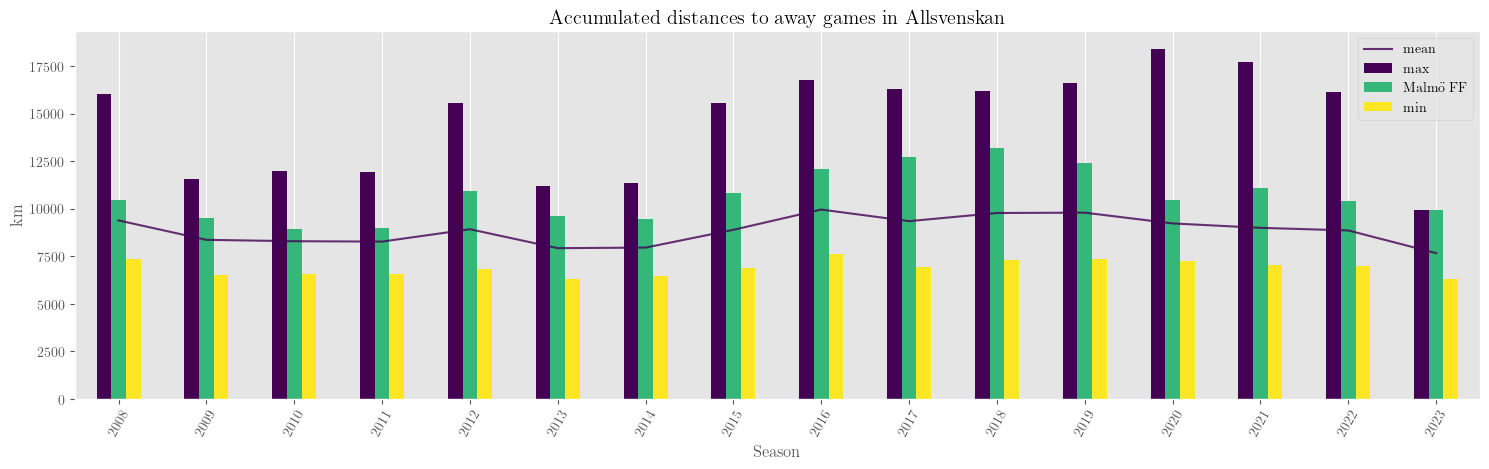

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
from itertools import cycle

cmap = cmaps.get_cmap('viridis').resampled(4)
color = cycle(cmap.colors)

def plot_distances(team=None, start_year=2008, end_year=2023):
    """ Plot distances. 
            
            Keyword arguments: 
                team : str
                    Select a team to plot along max, min and mean distances
    """
    # cmap = plt.get_cmap('Blues')
    # colors = iter(cmap.colors)
    df = pd.read_json('data/distances.json')
    df = df.loc[str(start_year):str(end_year)]
    max = df.max(axis=1)
    min = df.min(axis=1)
    mean = df.mean(axis=1)
    df2 = pd.DataFrame({'max': max, 'min': min, 'mean': mean})
    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_tight_layout('tight')
    if team is not None:
        team_data = df[team]
        df2[team] = team_data
        df2[['max', team, 'min']].plot(kind='bar', ax=ax, colormap=cmap)
    else:
        df2[['max', 'min']].plot(kind='bar', ax=ax, colormap=cmap)
    # df2['min'].plot(kind='bar', ax=ax, colormap=cmap, alpha=.8)
    df2['mean'].plot.line(color=next(color), alpha=.8)
    plt.title('Accumulated distances to away games in Allsvenskan')
    plt.xlabel('Season')
    plt.ylabel('km')
    plt.legend()
    plt.xticks(rotation=60)
    #ax.set_xticklabels(df.index)
    # plt.yticks(major_ticks)
    plt.grid(which='both', axis='y')

plot_distances('Malmö FF', start_year=2008)
# df.loc['2008':'2018']

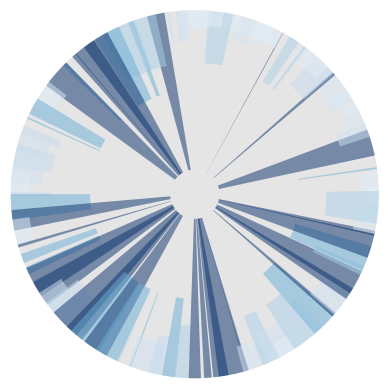

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)

# Compute pie slices
N = 88
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 13 / np.array([13, 9, 2, 3, 1, 5, 7, 9, 6, 7, 1, 4, 9, 3, 3, 1, 9, 9, 6, 9, 3, 10, 8, 5, 5, 1, 3, 2, 3, 2, 1, 1, 1, 2, 1, 7, 8, 2, 2, 4, 5, 4, 5, 8, 4, 2, 1, 9, 1, 2, 2, 1, 1, 6, 4, 1, 1, 2, 1, 2, 4, 2, 5, 4, 2, 3, 1, 1, 1, 1, 1, 6, 3, 5, 10, 3, 4, 2, 1, 5, 1, 1, 3, 2, 1, 1, 7, 3])
width = np.pi / 16 * np.random.rand(N)
# width = .3
colors = plt.cm.Blues(radii / 13.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(15, 0)
plt.grid();

In [615]:
df.sort_values('points', ascending=False).head()

,year,round,final,team_id,team_name,position,games,wins,draws,losses,gf,ga,gd,points
28474,2018,30,1,5,AIK,1,30,19,10,1,50,16,34,67
24634,2010,30,1,21,Malmö FF,1,30,21,4,5,59,24,35,67
27514,2016,30,1,21,Malmö FF,1,30,21,3,6,60,26,34,66
28954,2019,30,1,17,Djurgårdens IF,1,30,20,6,4,53,19,34,66
27034,2015,30,1,8,IFK Norrköping,1,30,20,6,4,60,33,27,66


## Säsonger och SM-guld

En scatter-plot över de olika lagens antal säsonger (i storlek) och SM-guld (i färg) utifrån koordinater. Data som behövs: en tabell över varje lag med koordinater, antal säsonger och antal SM-guld.

In [98]:
import plotly.express as px
from mpl_toolkits.basemap import Basemap

df = pd.read_csv('data/seasons_gold_coords.csv')
lat, lon = df['lat'], df['lon']
seasons, golds = df['seasons'], df['golds']

# fig = plt.figure(figsize=(15, 10))
# m = Basemap(projection = 'merc', llcrnrlat = 54, urcrnrlat = 70, llcrnrlon = 7, urcrnrlon = 25, resolution = 'l')
# m.drawcoastlines()
# m.drawcountries()
# m.scatter(lon, lat, latlon=True, label=None, c=golds, cmap='viridis', alpha=.5, s=seasons*10, linewidth=0)

# for s in [5, 25, 50, 75]:
#     plt.scatter([], [], c='k', alpha=.3, s=s*10, label=str(s))
# plt.legend(labelspacing=2, title='Antal säsonger', loc='upper left')
# plt.colorbar(label='Antal SM-guld')
# # plt.xlim(10, 25)
# # plt.ylim(54, 70)
# plt.grid()

fig = px.scatter_mapbox(df, lat='lat', lon='lon', size='seasons', size_max=25, hover_name=df.team, color='golds', color_continuous_scale='viridis', zoom=4.5, width=800, height=800)
fig.update_layout(mapbox_style='carto-positron', title='Säsonger och guld')

# df.loc[df.golds == 0].sort_values('seasons', ascending=False)


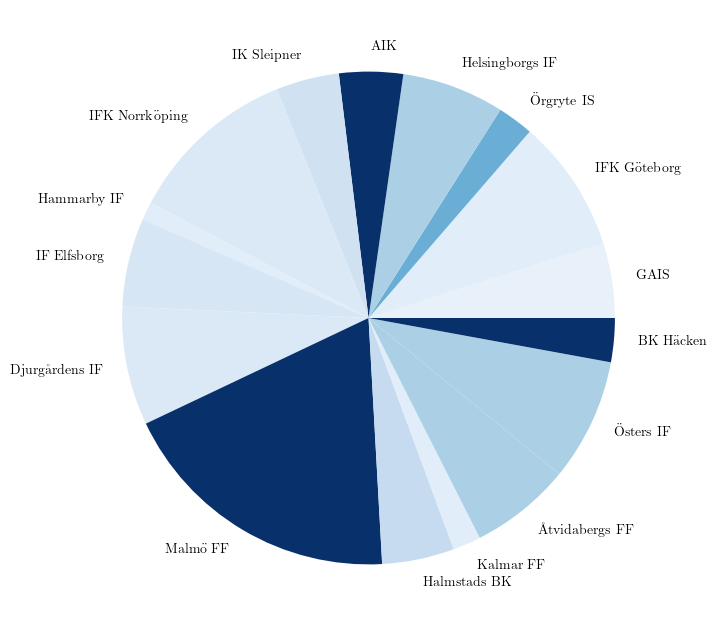

In [41]:
%matplotlib inline
df = df.loc[df.golds > 0]
df['guldsnitt'] = df.golds/df.seasons
df.sort_values('guldsnitt', ascending=False)
# df.guldsnitt.plot(kind='pie')
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df.guldsnitt, labels=df.team, normalize=True, colors=colors);

## Tabell med faktiska avstånd

([], [])

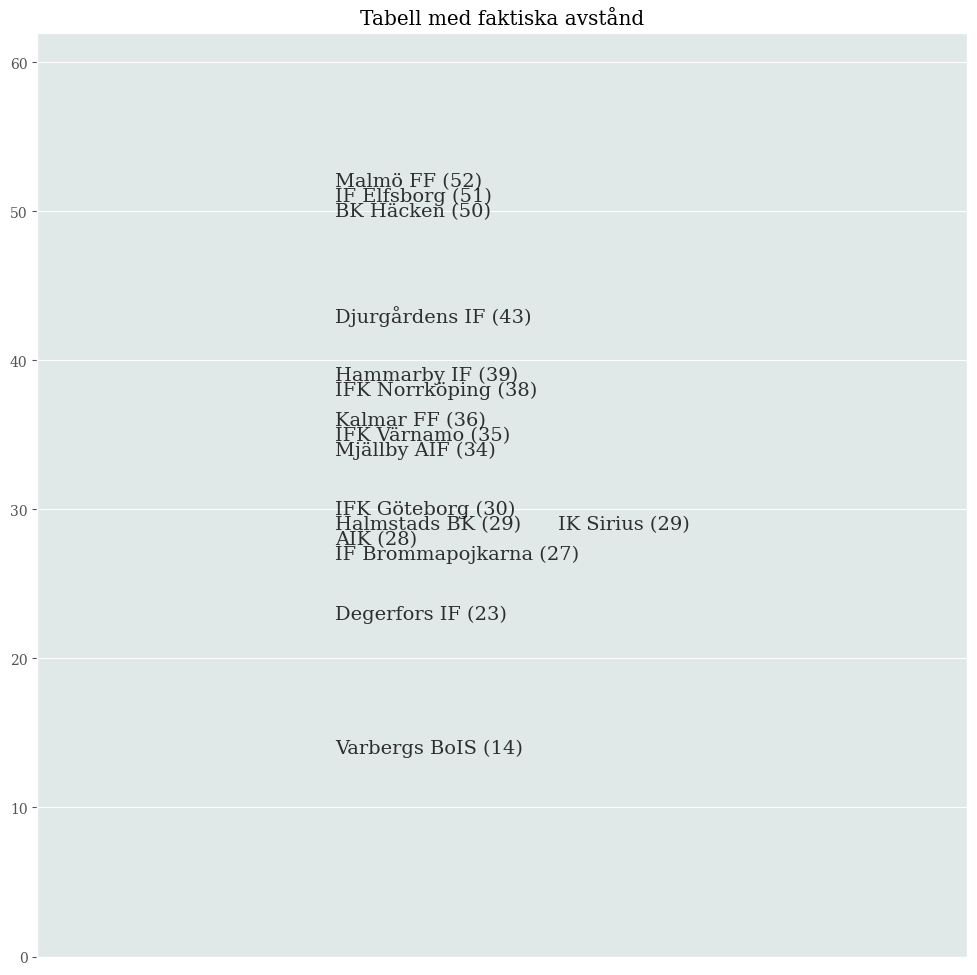

In [195]:
%matplotlib inline
import requests

r = 25

# data = requests.get(f'http://localhost:5000/standings_for_round/2023/{r}')
# json.dump(data.json(), open(f'data/23-{r}.json', 'w'))

df = pd.read_json(f'data/23-{r}.json')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('#2552')
ax.grid(visible=True, which='both', axis='y')
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 10
ys = []

for i, row in df.groupby('team'):
    points = row.points.values
    if points in ys:
        x = 8 + ys.count(points)*6
    else:
        x = 8
    ax.annotate(f'{i} ({points[0]})', [x, points], alpha=.8, va='center', fontsize=14)
    ys.append(points)

ax.set_title('Tabell med faktiska avstånd')
plt.xlim(0, 25)
plt.ylim(0, df.points.max() + 10)
plt.xticks([])

## Tabell med faktiska avstånd - animerad

In [206]:
# %matplotlib inline
df = pd.read_parquet('data/prog2.parq')
# df.dropna(inplace=True)

# df.progression = df.progression.str.removeprefix('[').str.removesuffix(']').str.split().convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True)
df.progression = df.progression.str.removeprefix('[').str.removesuffix(']').str.split().apply(lambda x: np.int16(x))

season = '2020'

fig, ax = plt.subplots(facecolor='lightgray', figsize=(10, 10))
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
df = df.loc[df.season == season]
plt.ioff()

def setup_ax():
    ax.cla()
    ax.set_facecolor('lightgray')
    ax.spines.left.set_visible(True)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 90)
    ax.set_xticks([1, 30])

data = []
for _ in range(0,len(df.progression.values[0])):
    data.append([])

for t, row in df.groupby('team'):
    ys = []
    for r in range(0, len(row.progression.values[0])):
        points = row.progression.values[0][r]
#         print(r+1, t, points)
        if points in ys:
            x = ys.count(points)*6
        else:
            x = 1
        ys.append(points)
        data[r].append({'team': t, 'x': x, 'y': points})


fig.set_tight_layout('tight')
for i, r in enumerate(data):
    setup_ax()
    ax.axvline(x=i+1, ymin=0, ymax=.02, color='k', alpha=.4, linewidth=3)
    # ys = []
    plt.title(f'Omgång {i+1}')
    x = 1
    for team in r:
        # if team['y'] in ys:
        #     x = ys.count(team['y'])*7
        # else:
        ax.annotate(team['team'], [x, team['y']], alpha=.8, fontsize=14)
    # print(team['y'].min())
        # ys.append(team['y'])
    plt.savefig(f'plots/anim/tables/{season}/{i+1:0>2}.png')


[[{'team': 'AIK', 'x': 1, 'y': 3},
  {'team': 'BK Häcken', 'x': 1, 'y': 1},
  {'team': 'Djurgårdens IF', 'x': 1, 'y': 3},
  {'team': 'Falkenbergs FF', 'x': 1, 'y': 1},
  {'team': 'Hammarby IF', 'x': 1, 'y': 3},
  {'team': 'Helsingborgs IF', 'x': 1, 'y': 0},
  {'team': 'IF Elfsborg', 'x': 1, 'y': 3},
  {'team': 'IFK Göteborg', 'x': 1, 'y': 0},
  {'team': 'IFK Norrköping', 'x': 1, 'y': 3},
  {'team': 'IK Sirius', 'x': 1, 'y': 0},
  {'team': 'Kalmar FF', 'x': 1, 'y': 0},
  {'team': 'Malmö FF', 'x': 1, 'y': 3},
  {'team': 'Mjällby AIF', 'x': 1, 'y': 0},
  {'team': 'Varbergs BoIS', 'x': 1, 'y': 3},
  {'team': 'Örebro SK', 'x': 1, 'y': 0},
  {'team': 'Östersunds FK', 'x': 1, 'y': 0}],
 [{'team': 'AIK', 'x': 6, 'y': 3},
  {'team': 'BK Häcken', 'x': 1, 'y': 2},
  {'team': 'Djurgårdens IF', 'x': 6, 'y': 3},
  {'team': 'Falkenbergs FF', 'x': 1, 'y': 4},
  {'team': 'Hammarby IF', 'x': 1, 'y': 4},
  {'team': 'Helsingborgs IF', 'x': 6, 'y': 0},
  {'team': 'IF Elfsborg', 'x': 1, 'y': 4},
  {'team': 

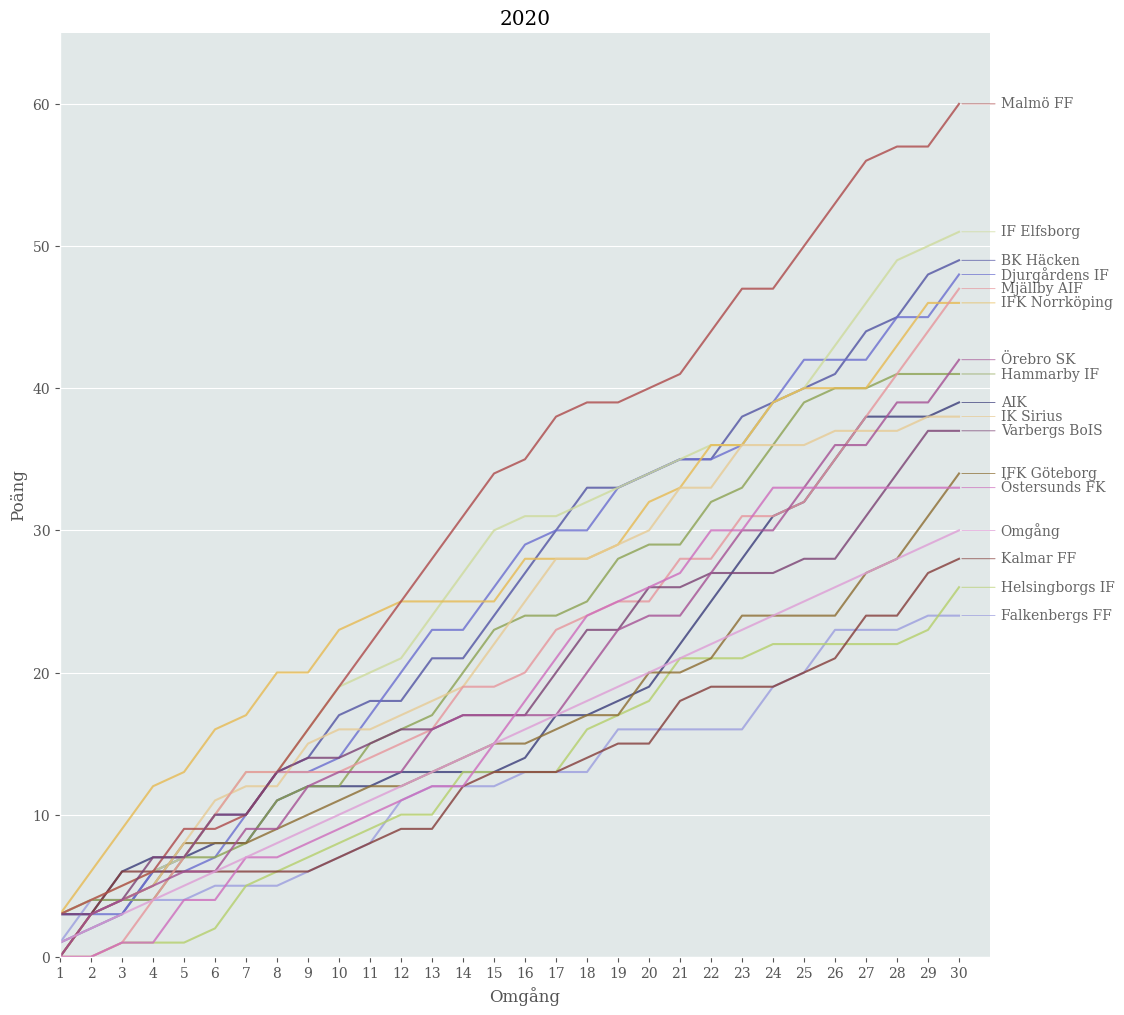

In [347]:
from matplotlib import colormaps as cmaps

%matplotlib inline

season = '2020'

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
colors = cmaps['tab20b'].resampled(17).colors
# data = []
# data = requests.get(f'http://localhost:5000/progressions/{season}')
# json.dump(data.json(), open(f'data/prog_{season}.json', 'w'))
# data.json()

df = pd.read_json(f'data/prog_{season}.json')
df['Omgång'] = np.arange(1, 31)
# df = df.set_index(df['Omgång'])
plot = True

if plot:
    fig, ax = plt.subplots(figsize=(12, 12))
    # ax.set_frame_on(False)
    ax.set_facecolor('#2552')
    ax.grid(visible=True, axis='y')
    ax.grid(visible=False, axis='x')
    ax.spines[['right', 'top']].set_visible(False)
    for c, col in enumerate(df.columns):
        ax.plot(*[df['Omgång'], df[col].values], color=colors[c], alpha=.8, linewidth=1.5)
        x = 30
        y = df[col].values[-1]
        # x = 24 * df.iloc[-1].value_counts()[df[col].values[-1]]
        ax.annotate(col, xy=[x, y], xytext=[x, 0], textcoords=('offset points'), arrowprops=dict(arrowstyle='-', color=colors[c], linewidth=.5), alpha=.6, fontsize=10, annotation_clip=False, va='center')

    plt.title(season)
    plt.ylim(0, df.max().max() + 5)
    plt.xlim(1, 31)
    plt.xlabel('Omgång')
    plt.ylabel('Poäng')
    plt.xticks(np.arange(1, 31));

# df.iloc[-1].value_counts()[29]

Text(0.5, 0, 'Avstånd (km)')

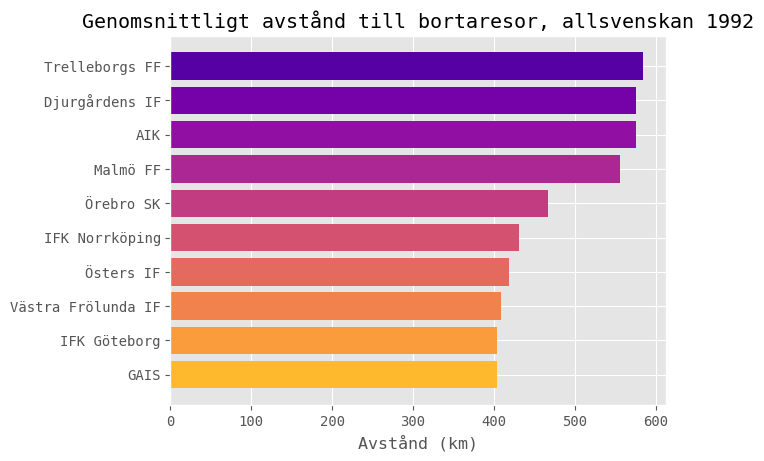

In [18]:
#Distances per season

season = '1992'

dist = pd.read_json('data/distances.json')
dists = dist.loc[season].dropna().sort_values()
dists = dists/len(dists-1)
colors = plt.colormaps['plasma_r'](
    np.linspace(.15, .85, len(dists))
)
# dists.plot(kind='barh', cmap=cmap)
for i, ((t, d), c) in enumerate(zip(dists.items(), colors)):
    plt.barh(width=d, y=i, label=t, color=c)
plt.yticks(ticks=np.arange(0, len(dists)), labels=dists.keys());
plt.title(f'Genomsnittligt avstånd till bortaresor, allsvenskan {season}')
plt.xlabel('Avstånd (km)')

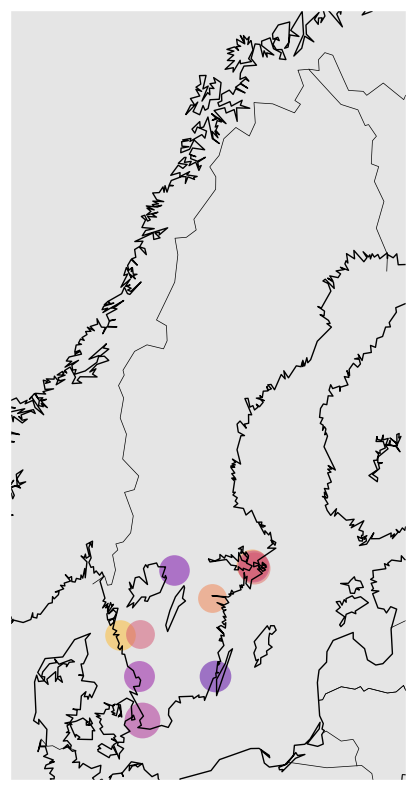

In [19]:
season = '2023'
dists_df = pd.read_json('data/distances.json')
coords_df = pd.read_json('data/venues.json')
dists = pd.DataFrame(data = dists_df.loc[season].dropna())
dists = dists/15
dists['lat'] = coords_df.lat
dists['lon'] = coords_df.lon

fig = plt.figure(figsize=(15, 10))
m = Basemap(projection = 'merc', llcrnrlat = 54, urcrnrlat = 70, llcrnrlon = 7, urcrnrlon = 25, resolution = 'l')
m.drawcoastlines()
m.drawcountries()
for ((d, lat, lon), c) in zip(dists.values, colors):
    m.scatter(lon, lat, latlon=True, label=None, alpha=.5, s=d, color=c, linewidth=0)
plt.grid()

### Tabeller 2008-2022

In [331]:
import requests
import json

# plt.style.use('default')
# plt.rc('font', size=10, family='monospace')
plt.rcParams['axes.facecolor'] = '#ccc'
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.tight_layout()
# fig, ax = plt.subplots(1, 3, figsize=(10, 4))

columns = ['position', 'team', 'games', 'wins', 'draws', 'losses', 'gf', 'ga', 'gd', 'points', 'ppg']

# data = requests.get('http://localhost:5000/final_standings/2008/2022')
# json.dump(data.json(), open('data/08-22.json', 'w'))
with open('data/08-22.json', 'r') as f:
    data = json.load(f)

df = pd.concat([pd.DataFrame(v) for v in data.values()], keys=map(int, data.keys()))
df['gd'] = df.gf - df.ga
df['ppg'] = df.points / df.games

df = df.reindex(columns=columns)

def get_team(df, team):
    return df.loc[df.team == team]

def get_season(dfr, season):
    try:
        return dfr.loc(season)
    except:
        return dfr.loc[str(season)]
    finally:
        raise ValueError(f'No season with year {season} found')


<Figure size 640x480 with 0 Axes>

Halmstads BK 0.0
IK Sirius 0.05


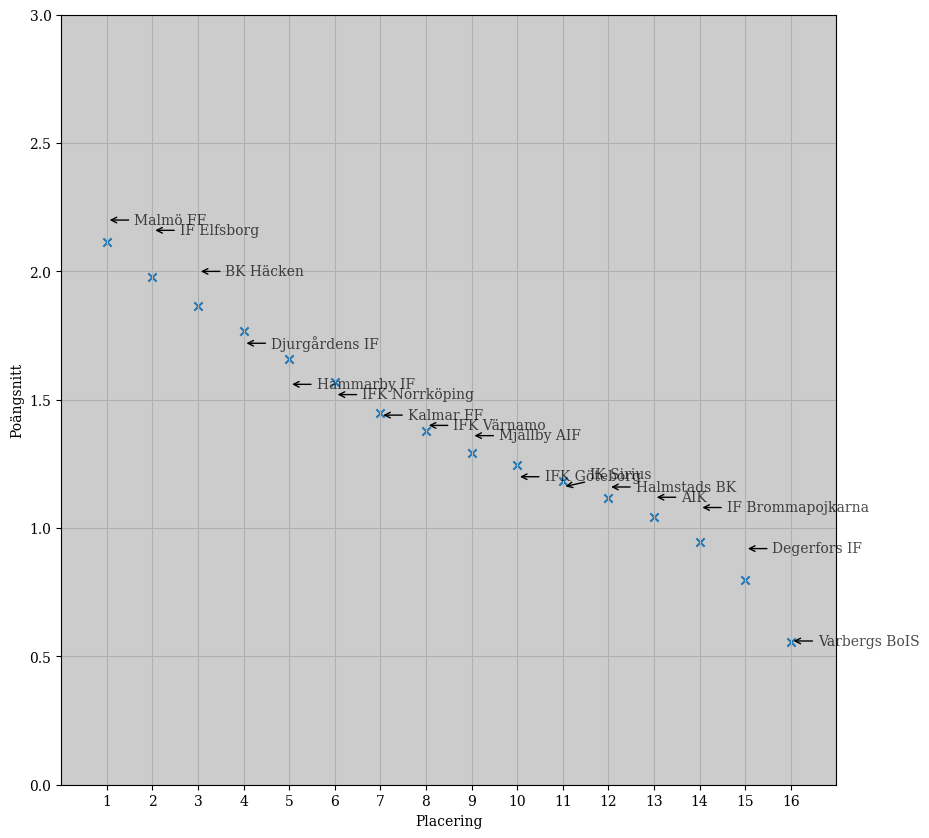

In [332]:
# data = requests.get('http://localhost:5000/standings_for_round/2023/25')
# json.dump(data.json(), open('data/23-25.json', 'w'))


teams = pd.read_json('data/23-25.json')
teams['ppg'] = teams.points/teams.games
fig, ax = plt.subplots(figsize=(10, 10))

x=np.arange(1, 17)
y = []

for (i, row) in df.groupby('position'):
    y.append(row.ppg.mean())

ax.grid()
ax.scatter(x=x, y=y, marker='x')
ax.set_xlim(0, 17)
ax.set_ylim(0, 3)
ax.set_xticks(x);
ax.set_xlabel('Placering')
ax.set_ylabel('Poängsnitt')
j = -.05
for i, row in teams.groupby('team'):
    try:
        same_points = teams.points.value_counts()[row.points] > 1
    except:
        same_points = False
    if same_points.values[0]:
        j += .05
        print(f'{i} {j}')
        ax.annotate(i, xy=(row.position, row.ppg), xytext=(row.position+.6, row.ppg + j), arrowprops=dict(arrowstyle='->'), va='center', alpha=.7)
    else:
        ax.annotate(i, xy=(row.position, row.ppg), xytext=(row.position+.6, row.ppg), arrowprops=dict(arrowstyle='->'), va='center', alpha=.7)

# teams

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

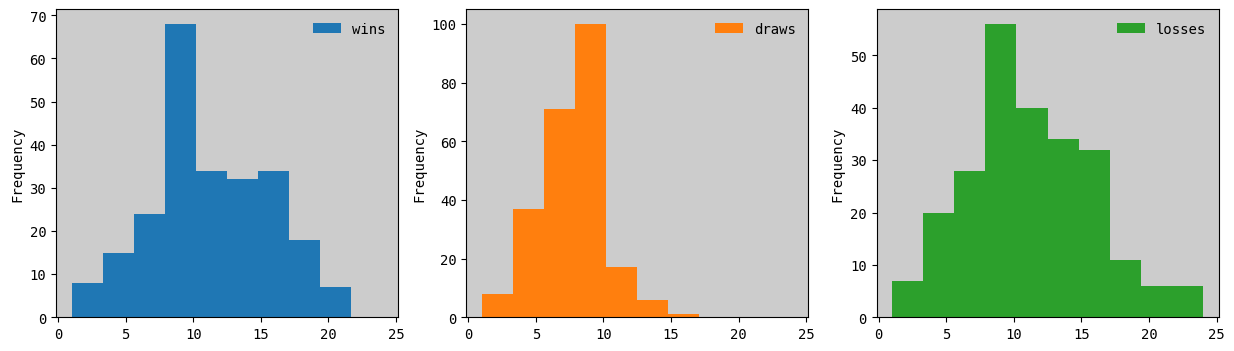

In [79]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'monospace'
df[['wins', 'draws', 'losses']].plot(kind='hist', subplots=True, layout=(1, 3), figsize=(15, 4))

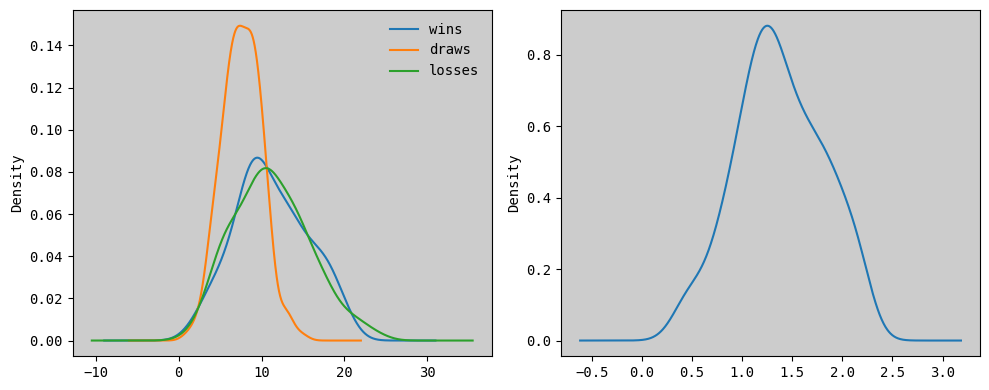

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[['wins', 'draws', 'losses']].plot(kind='kde', ax=ax[0])
df['ppg'].plot(kind='kde', ax=ax[1])
plt.tight_layout()

Text(0.5, 0, 'Losses')

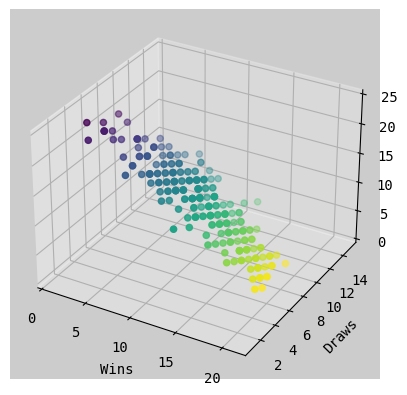

In [24]:
ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = df.wins, df.draws, df.losses
ax.scatter(X, Y, Z, c=df.points)
ax.set_xlabel('Wins')
ax.set_ylabel('Draws')
ax.set_zlabel('Losses')
# df.plot(kind='scatter', x='wins', y='draws', s='losses', c='position', cmap='RdBu', alpha=.8, ax=ax)

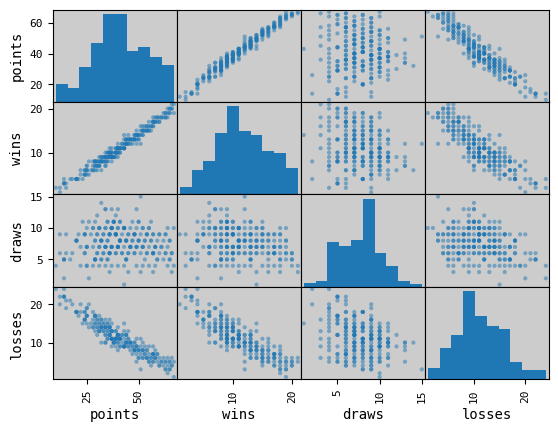

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['points', 'wins', 'draws', 'losses']
scatter_matrix(df[attributes]);

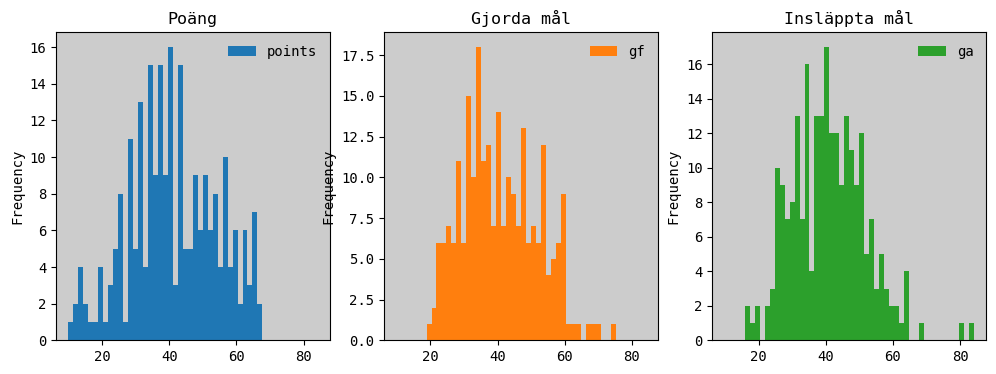

In [26]:
# Points and goals

df[['points', 'gf', 'ga']].plot(kind='hist', subplots=True, bins=50, layout=(1, 3), figsize=(12, 4), title=['Poäng', 'Gjorda mål', 'Insläppta mål']);

Text(0.5, 0, 'PPG')

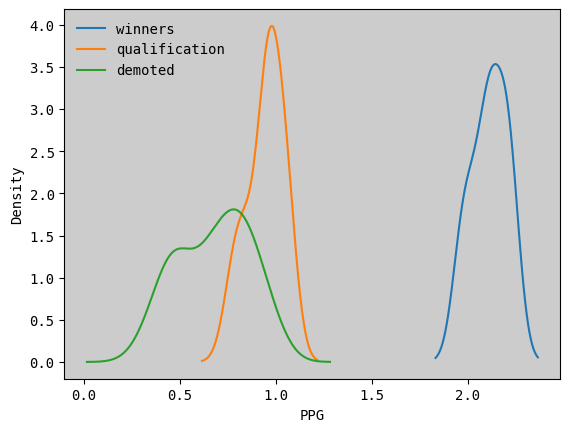

In [27]:
winners = df.loc[df.position == 1]
demoted = df.loc[df.position >= 15]
kvalare = df.loc[df.position == 14]
winners.ppg.plot(kind='kde', label='winners')
kvalare.ppg.plot(kind='kde', label='qualification')
demoted.ppg.plot(kind='kde', label='demoted')
plt.legend()
plt.xlabel('PPG')

<Axes: ylabel='Density'>

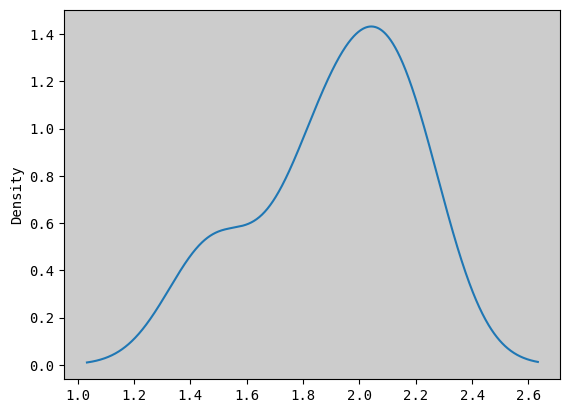

In [28]:
# MFF

mff = get_team(df, 'Malmö FF')
mff.sort_values('points', ascending=False)
mff.ppg.plot(kind='kde')

In [599]:
df = pd.read_csv('data/allsvenskan.csv', index_col=['year', 'round']).sort_values(['year', 'round', 'position'])
df['ppg_3pwin'] = (df.wins*3+df.draws)/df.games
final_rounds = df[df.final == 1]

In [598]:
final_rounds[['position', 'ppg_3pwin']].corr()

,position,ppg_3pwin
position,1.000000,-0.915644
ppg_3pwin,-0.915644,1.000000


In [492]:
since_2008 = final_rounds.loc[2008:2022]

wins = since_2008[since_2008.position == 1].team.value_counts()
wins

Malmö FF           7
AIK                2
Kalmar FF          1
Helsingborgs IF    1
IF Elfsborg        1
IFK Norrköping     1
Djurgårdens IF     1
BK Häcken          1
Name: team, dtype: int64

Text(0.5, 1.0, 'SM-guld sedan 2008')

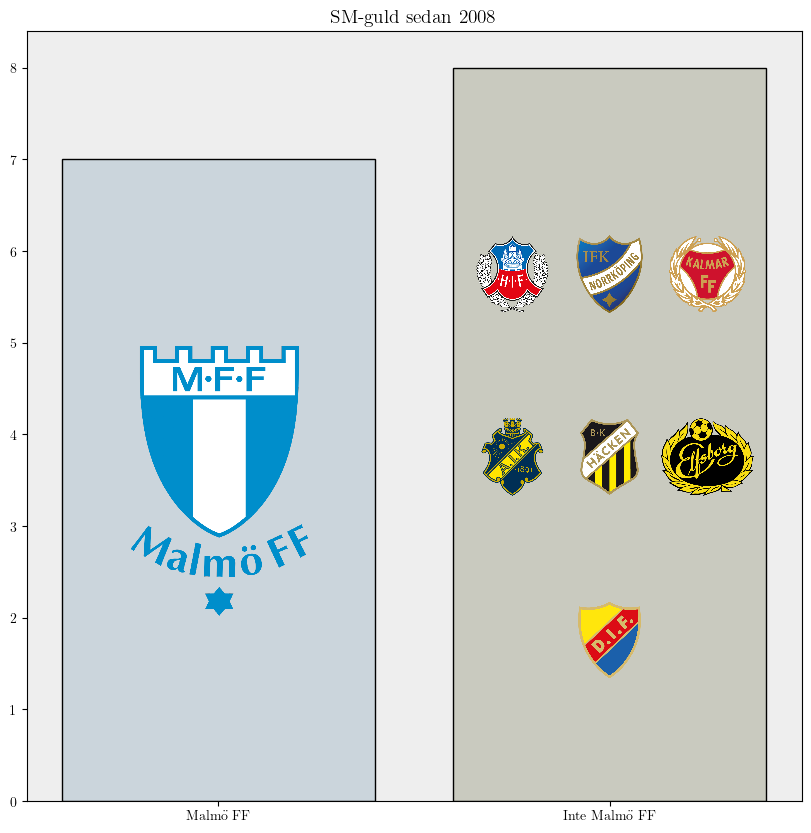

In [493]:
# Vinnare

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.rcParams['axes.facecolor'] = '#eee'

def get_logo(name):
    path = f'img/{name.replace(" ", "_")}.png'
    img = plt.imread(path)
    return img

def offset_image(coords, name, ax, zoom):
    img = get_logo(name)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax

    ab = AnnotationBbox(im, coords, xybox=coords, frameon=False)

    ax.add_artist(ab)

# winners = df.loc[df.position == 1]
# # (winners.points / winners.games).plot(kind='hist', bins=15, title='Poängsnitt för SM-guld 2008-2022');
mff = set(['Malmö FF'])
others = list(set(wins.index) - mff)
# m = winners.team.value_counts().loc['Malmö FF'].sum()
# o = winners.team.value_counts().loc[others].sum()

mff_wins = wins['Malmö FF']
other_wins = wins[wins.index[1:]].sum()

fig, ax = plt.subplots(figsize=(10, 10))

ax.bar([1, 2], [mff_wins, other_wins], color=['#CBD5DC', '#C9CABF'], edgecolor='k')
ax.set_xticks([1, 2], labels=['Malmö FF', 'Inte Malmö FF'])
# ax.set_xlim(0, 3)
# ax.set_ylim(0, 10)
offset_image((1, 3.5), 'Malmö FF', ax, .2)
other_y_start = 5.75
o_coords = [(1.75, other_y_start), (2, other_y_start), (2.25, other_y_start), (1.75, other_y_start-2), (2, other_y_start-2), (2.25, other_y_start-2), (2, other_y_start-4)]
for t, coords in zip(others, o_coords):
    offset_image(coords, t, ax, .1)

plt.title('SM-guld sedan 2008', size=14)


### Efter nuvarande omgång 2008-2022

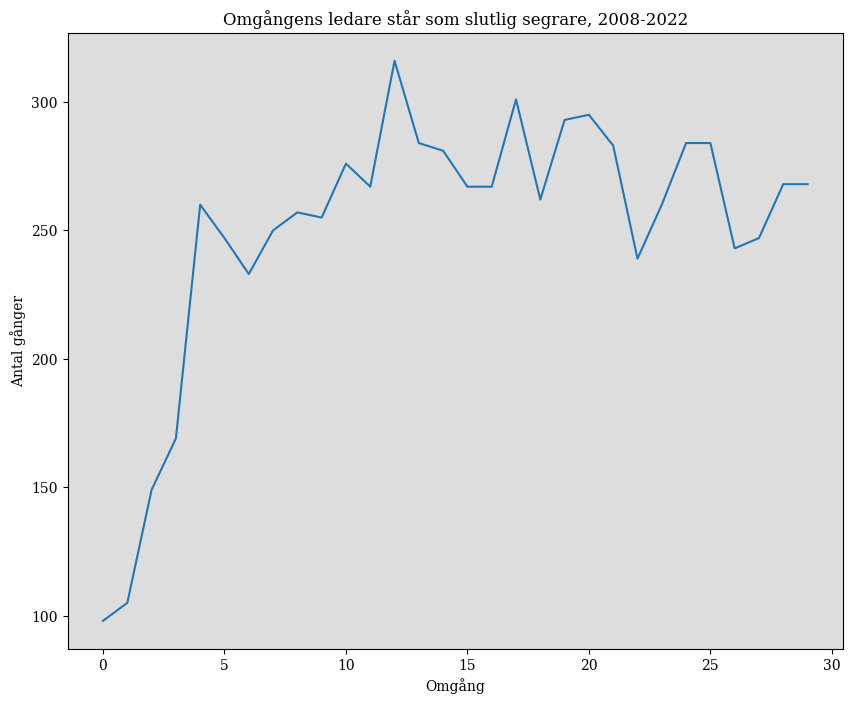

In [891]:
all_rounds_since_2008 = df.loc[2008:2022].reset_index()

rounds = np.arange(1, 31)
data = []
for r in rounds:
    round_since_2008 = all_rounds_since_2008[all_rounds_since_2008['round'] == r]
    leaders_after_round_since_2008 = round_since_2008[round_since_2008['position'] == 1]
    winners = since_2008[since_2008['position'] == 1]
    l_winners = leaders_after_round_since_2008.merge(winners, on='year', suffixes=[f'_l{r}', '_win'])[['year', f'team_name_l{r}', 'team_name_win']]
    data.append(l_winners[l_winners[f'team_name_l{r}'] == l_winners['team_name_win']].count()['year'])
pd.Series(data).plot(title='Omgångens ledare står som slutlig segrare, 2008-2022', xlabel='Omgång', ylabel='Antal gånger', figsize=(10, 8));

In [893]:
r = 2
round_since_2008 = all_rounds_since_2008[all_rounds_since_2008['round'] == r]
leaders_after_round_since_2008 = round_since_2008[round_since_2008['position'] == 1]
winners = since_2008[since_2008['position'] == 1]
l_winners = leaders_after_round_since_2008.merge(winners, on='year', suffixes=[f'_l{r}', '_win'])[['year', f'team_name_l{r}', 'team_name_win']]
l_winners[l_winners[f'team_name_l{r}'] == l_winners['team_name_win']]

,year,team_name_l2,team_name_win
1,2008,Hammarby IF,Hammarby IF
31,2009,Helsingborgs IF,Helsingborgs IF
32,2009,Helsingborgs IF,Helsingborgs IF
36,2009,Helsingborgs IF,Helsingborgs IF
37,2009,Helsingborgs IF,Helsingborgs IF
...,...,...,...
424,2022,Hammarby IF,Hammarby IF
425,2022,Hammarby IF,Hammarby IF
426,2022,Hammarby IF,Hammarby IF
427,2022,Hammarby IF,Hammarby IF


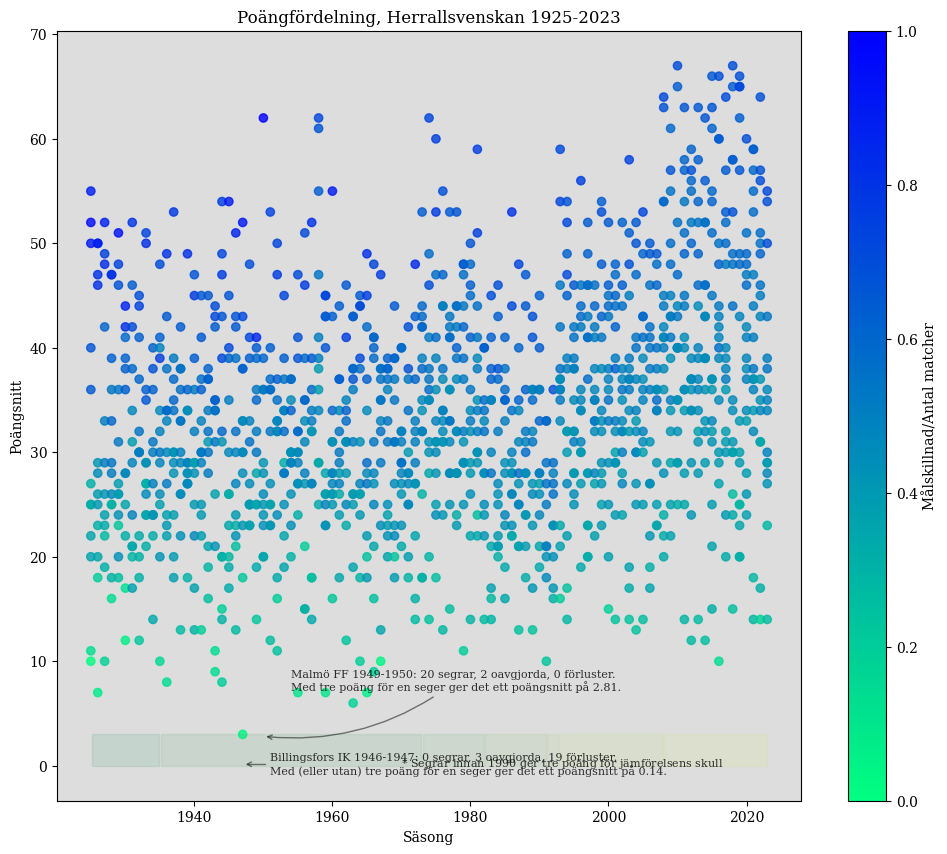

In [908]:
# from matplotlib.cm import ScalarMappable
from matplotlib.path import Path

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.facecolor'] = '#ddd'

colors = plt.colormaps['summer'](
    np.linspace(.15, .85, 7)
)


fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(final_rounds.index.get_level_values(0), final_rounds.ppg_3pwin, alpha=.8, c=(final_rounds.ga-final_rounds.gf)/final_rounds.games, cmap="winter")
ax.set(title='Poängfördelning, Herrallsvenskan 1925-2023', xlabel='Säsong', ylabel='Poängsnitt')
ax.text(1970, -.1, '$*$ Segrar innan 1990 ger tre poäng för jämförelsens skull', size=8, alpha=.8)
ax.annotate('Malmö FF 1949-1950: 20 segrar, 2 oavgjorda, 0 förluster.\nMed tre poäng för en seger ger det ett poängsnitt på 2.81.', (1950, 2.81), xytext=(20, 40), textcoords='offset points', size=8, va='center', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2', alpha=.5), alpha=.8)
ax.annotate('Billingsfors IK 1946-1947: 0 segrar, 3 oavgjorda, 19 förluster.\nMed (eller utan) tre poäng för en seger ger det ett poängsnitt på 0.14.', (1947, .14), xytext=(20, 0), textcoords='offset points', size=8, va='center', arrowprops=dict(arrowstyle='->', connectionstyle='arc,rad=-.2', alpha=.5), alpha=.8)

years_with_change = [1925, 1935, 1973, 1982, 1991, 1993, 2008]

for c, y in enumerate(years_with_change):
    try:
        ax.fill_betweenx([0, 3], y+.1, years_with_change[c+1]-.1, color=colors[c], alpha=.12)
    except:
        ax.fill_betweenx([0, 3], y+.1, 2023, color=colors[c], alpha=.12)

plt.colorbar(plt.cm.ScalarMappable(cmap='winter_r'), ax=ax, label='Målskillnad/Antal matcher')


In [323]:
no_of_team_changed = final_rounds.groupby('year')['team'].count().diff().fillna(0) != 0
no_of_team_changed[no_of_team_changed]
for y in [1925, 1934, 1935, 1973, 1982, 1991, 1993, 2008]:
    print(y, final_rounds.loc[y].position.max())

1925 12
1934 11
1935 12
1973 14
1982 12
1991 10
1993 14
2008 16


<Axes: xlabel='year,round'>

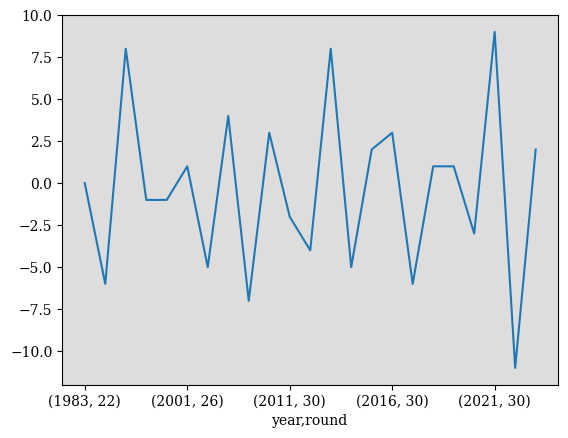

In [445]:
# final_rounds = final_rounds.reset_index()
final_rounds[final_rounds.team == 'BK Häcken'].position.diff().fillna(0).plot()
# final_rounds.reset_index()

In [448]:
final_rounds['gd'] = final_rounds.gf-final_rounds.ga
final_rounds.loc[2016]

C:\Users\linus\AppData\Local\Temp\ipykernel_29536\4049949230.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,final,team,position,games,wins,draws,losses,gf,ga,points,ppg_3pwin,gd
round,,,,,,,,,,,,
30,1,Malmö FF,1,30,21,3,6,60,26,66,2.200000,34
30,1,AIK,2,30,17,9,4,52,26,60,2.000000,26
30,1,IFK Norrköping,3,30,18,6,6,59,37,60,2.000000,22
30,1,IFK Göteborg,4,30,14,8,8,56,47,50,1.666667,9
30,1,IF Elfsborg,5,30,13,9,8,58,38,48,1.600000,20
30,1,Kalmar FF,6,30,12,8,10,45,40,44,1.466667,5
30,1,Djurgårdens IF,7,30,14,1,15,48,47,43,1.433333,1
30,1,Östersunds FK,8,30,12,6,12,44,46,42,1.400000,-2
30,1,Örebro SK,9,30,11,8,11,48,51,41,1.366667,-3


[(0.0, 1.0),
 (1.0, 55.0),
 [Text(0.0, 0, ''),
  Text(0.2, 0, ''),
  Text(0.4, 0, ''),
  Text(0.6000000000000001, 0, ''),
  Text(0.8, 0, ''),
  Text(1.0, 0, '')],
 Text(0.5, 1.0, 'Damallsvenskan 2023 omg. 21/22')]

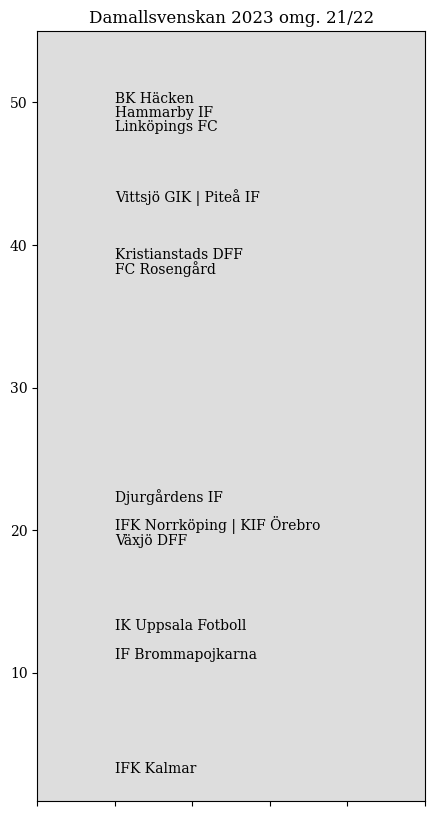

In [1069]:
data = [('BK Häcken', 50),
('Hammarby IF', 49),
('Linköpings FC', 48),
('Vittsjö GIK | Piteå IF', 43),
('Kristianstads DFF', 39),
('FC Rosengård', 38),
('Djurgårdens IF', 22),
('IFK Norrköping | KIF Örebro', 20),
('Växjö DFF', 19),
('IK Uppsala Fotboll', 13),
('IF Brommapojkarna', 11),
('IFK Kalmar', 3)]

fig, ax = plt.subplots(figsize=(5, 10))
for row in data:
    ax.text(.2, row[1], row[0])
ax.set(xlim=(0, 1), ylim=(1, 55), xticklabels=[], title='Damallsvenskan 2023 omg. 21/22')